# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()

# Fetch current ETH price
# YOUR CODE HERE!
eth_price = requests.get(eth_url).json()
# Compute current value of my crpto
# Contradicting instructions were given to us. In one area it asked us to find values in Canadian dollars and in the other it asked us to find values in US dollars.
# Since we will be adding the cryptocurrency values with stock values later, and since SPY and AGG will give us values in US dollars, I will obtain all values in US dollars from now on to avoid any currency conversion. 
my_btc_value = float(btc_price['data']['1']['quotes']['USD']['price']) * my_btc
my_eth_value = float(eth_price['data']['1027']['quotes']['USD']['price']) * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} USD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} USD")

The current value of your 1.2 BTC is $50894.40 USD
The current value of your 5.3 ETH is $11803.52 USD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv('ALPACA_API_KEY')
api_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(api_key, api_secret_key, api_version = 'v2')

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp.today(tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df = alpaca.get_bars(tickers, timeframe, start = '2023-12-12', end = '2023-12-12').df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG_df = df[df['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY_df = df[df['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
concat_df = pd.concat([AGG_df, SPY_df], axis = 1, keys = ['AGG', 'SPY'])
# Preview DataFrame
# YOUR CODE HERE!
concat_df

AGG                                               \
                           close   high      low trade_count   open    volume   
timestamp                                                                       
2023-12-12 05:00:00+00:00  97.19  97.19  96.8213       33503  96.94  11711463   

                                        SPY                                    \
                                vwap  close   high    low trade_count    open   
timestamp                                                                       
2023-12-12 05:00:00+00:00  97.080235  464.1  464.2  460.6      438136  461.63   

                                                 
                             volume        vwap  
timestamp                                        
2023-12-12 05:00:00+00:00  68329617  462.917041

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = concat_df['AGG']['close'].iloc[0]
spy_close_price = concat_df['SPY']['close'].iloc[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price} USD")
print(f"Current SPY closing price: ${spy_close_price} USD")

Current AGG closing price: $97.19 USD
Current SPY closing price: $464.1 USD


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * float(spy_close_price)
my_agg_value = my_agg * float(agg_close_price)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f} USD")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f} USD")

The current value of your 50 SPY shares is $23205.00 USD
The current value of your 200 AGG shares is $19438.00 USD


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
total_values = {'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}
columns = ['crypto', 'shares']
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(total_values, index = columns)
# Display savings DataFrame
display(df_savings)

,amount
crypto,62697.924
shares,42643.000


<Axes: ylabel='amount'>

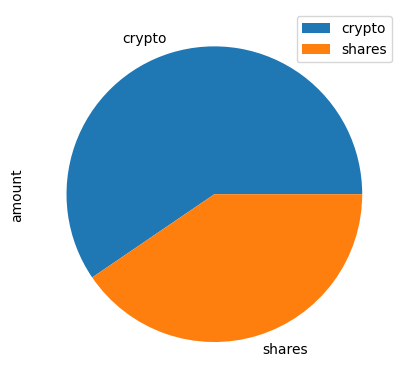

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y = 'amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value
# Validate saving health
# YOUR CODE HERE!
def enough_fund_checker(savings):
    if savings > emergency_fund:
        print('Congratulations. You have enough money.')
    elif savings == emergency_fund:
        print('Congratulations. You have reached your financial goal.')
    else:
        print(f'You still need ${emergency_fund - savings} to reach your goal')

enough_fund_checker(total_savings)


Congratulations. You have enough money.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of ten years back from today. (Instruction asked us to get 10 years worth historical closing data)
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2013-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
monte_carlo_df = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
monte_carlo_AGG = monte_carlo_df[monte_carlo_df['symbol'] == 'AGG'].drop('symbol', axis = 1)
monte_carlo_SPY = monte_carlo_df[monte_carlo_df['symbol'] == 'SPY'].drop('symbol', axis = 1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([monte_carlo_AGG, monte_carlo_SPY], axis = 1, keys = ['AGG', 'SPY'])
# Display sample data
df_stock_data.head()

AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-01-04 05:00:00+00:00  107.97  108.29  107.93       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.87        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.22       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.21       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.35       11442  108.57   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-01-04 05:00:00+00:00  3821479  108.078566  201.0192  201.03  198.59   
2016-01-05 05:00:00+00:00  2757684  107.990501  201.3600  201.90  200.05   
2016-01-06 05:00:00+00:00  3048156  108.363216  198.8200  200.06  197.60   
2016-01-07 05:00:00+00:00  2530827  108.368381  194.0500  197.44  193.59   
2016-01-08 05:00:00+00:00  4047091  108.587804  191.9230  195.85  191.58   

                                                                       
                          trade_count     open     volume        vwap  
timestamp                                                              
2016-01-04 05:00:00+00:00      655489  200.490  225903783  200.656423  
2016-01-05 05:00:00+00:00      418709  201.405  112719152  201.084280  
2016-01-06 05:00:00+00:00      548386  198.330  153948196  198.956460  
2016-01-07 05:00:00+00:00      796451  195.330  216191953  195.345911  
2016-01-08 05:00:00+00:00      754102  195.190  216105404  193.644537

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years = MCSimulation(portfolio_data = df_stock_data, weights = [0.4, 0.6], num_simulation = 500, num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_years.portfolio_data.head()

AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-01-04 05:00:00+00:00  107.97  108.29  107.93       14860  108.09   
2016-01-05 05:00:00+00:00  108.02  108.12  107.87        8860  107.87   
2016-01-06 05:00:00+00:00  108.43  108.46  108.22       13183  108.35   
2016-01-07 05:00:00+00:00  108.42  108.47  108.21       12305  108.40   
2016-01-08 05:00:00+00:00  108.66  108.71  108.35       11442  108.57   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-01-04 05:00:00+00:00  3821479  108.078566          NaN  201.0192  201.03   
2016-01-05 05:00:00+00:00  2757684  107.990501     0.000463  201.3600  201.90   
2016-01-06 05:00:00+00:00  3048156  108.363216     0.003796  198.8200  200.06   
2016-01-07 05:00:00+00:00  2530827  108.368381    -0.000092  194.0500  197.44   
2016-01-08 05:00:00+00:00  4047091  108.587804     0.002214  191.9230  195.85   

                                                                               \
                              low trade_count     open     volume        vwap   
timestamp                                                                       
2016-01-04 05:00:00+00:00  198.59      655489  200.490  225903783  200.656423   
2016-01-05 05:00:00+00:00  200.05      418709  201.405  112719152  201.084280   
2016-01-06 05:00:00+00:00  197.60      548386  198.330  153948196  198.956460   
2016-01-07 05:00:00+00:00  193.59      796451  195.330  216191953  195.345911   
2016-01-08 05:00:00+00:00  191.58      754102  195.190  216105404  193.644537   

                                        
                          daily_return  
timestamp                               
2016-01-04 05:00:00+00:00          NaN  
2016-01-05 05:00:00+00:00     0.001695  
2016-01-06 05:00:00+00:00    -0.012614  
2016-01-07 05:00:00+00:00    -0.023992  
2016-01-08 05:00:00+00:00    -0.010961

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991276,0.997155,1.011781,0.992944,0.992648,1.003507,0.998006,0.999706,1.004343,1.005368,...,0.991779,0.982851,1.009788,1.004920,1.007621,0.994121,1.014145,0.988077,1.001663,1.003271
2,0.977166,0.996479,1.020199,0.996039,1.003193,1.006562,1.007218,0.998813,0.999053,1.012399,...,0.994244,0.985306,1.010041,0.999926,1.004523,0.998885,1.006447,0.984020,0.992163,1.006758
3,0.968814,0.994083,1.002770,1.007623,1.003391,1.003472,1.011115,0.995284,0.996260,1.015313,...,0.988520,0.983177,1.018235,0.995259,0.996306,0.999787,1.014968,0.990470,1.001624,1.002171
4,0.976276,0.986746,0.999706,1.016275,1.001393,1.003583,1.003355,0.986201,1.006868,1.010619,...,0.982701,0.992597,1.016610,1.003635,0.995228,1.005023,1.018744,0.980451,1.000087,1.006688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.495397,3.556594,2.209162,9.177843,2.570525,5.776185,6.858123,6.638573,7.775428,9.314115,...,4.133769,16.310568,12.093207,16.970206,13.093972,11.872943,9.285285,4.082692,3.575487,9.451547
7557,21.497440,3.513537,2.202921,9.163975,2.557848,5.751533,6.889233,6.578278,7.831593,9.348117,...,4.168763,16.306189,12.084644,16.926407,13.165875,11.986376,9.321183,4.082690,3.543735,9.447115
7558,21.423515,3.494389,2.210006,9.236003,2.579026,5.817056,6.896271,6.557174,7.829218,9.455866,...,4.156893,16.325761,12.071828,16.965295,13.201446,12.066434,9.353027,4.085838,3.544238,9.534797
7559,21.615493,3.536556,2.182854,9.331629,2.586841,5.768197,6.826866,6.633863,7.834670,9.408978,...,4.161743,16.407735,12.246270,17.045593,13.210077,12.015233,9.378750,4.109120,3.561504,9.537458


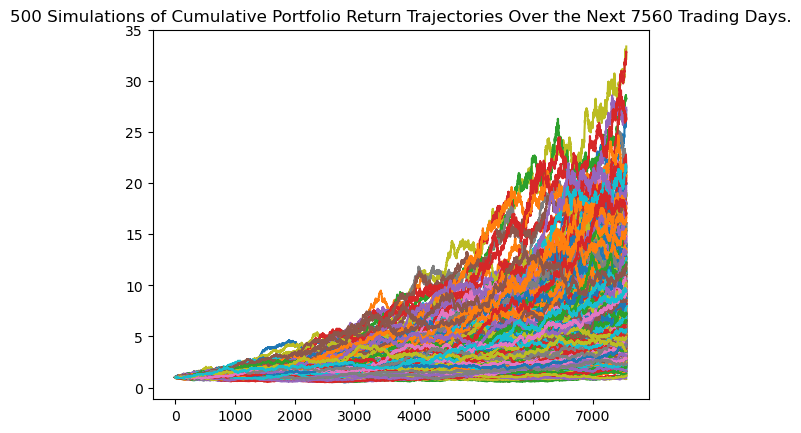

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_years.plot_simulation()
#line_plot.get_figure().savefig("MC_thirtyyears_sim_plot.png", bbox_inches="tight")

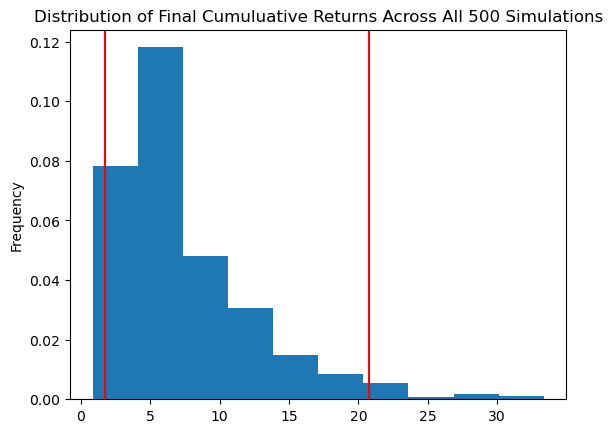

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              7.485259
std               5.059436
min               0.851999
25%               4.077529
50%               6.080176
75%               9.537624
max              33.360388
95% CI Lower      1.700475
95% CI Upper     20.734149
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]* initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34009.51 and $414682.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]* initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51014.26 and $622024.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years = MCSimulation(portfolio_data = df_stock_data, weights = [0.2, 0.8], num_simulation = 500, num_trading_days = 252*5)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005026,0.982698,1.000947,1.009852,1.003222,0.999691,1.014005,0.989155,1.005416,0.998845,...,1.006222,1.003409,0.991571,0.988707,1.004045,1.004826,0.996309,1.014236,0.995175,0.987900
2,0.991720,0.983888,1.014220,1.014349,0.979538,0.991398,1.024411,0.987904,1.005730,1.004007,...,1.001918,1.000282,1.005393,0.988968,1.026825,1.005702,1.003072,1.024444,0.994490,0.984037
3,0.999803,0.985293,1.010984,1.007673,0.974021,0.990964,1.023659,1.003874,1.008907,1.006630,...,0.987688,1.000585,1.001230,0.981759,1.029610,1.009494,0.995709,1.016386,1.002198,0.985819
4,1.003992,0.994547,1.007925,1.004704,0.982512,1.001610,1.025472,0.999455,1.004470,1.010782,...,0.988533,0.994395,1.020094,0.983372,1.039293,1.031179,1.007183,1.015960,0.995685,0.993163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.160286,1.622548,0.987327,1.552404,0.871038,1.139030,1.172781,1.423242,2.034521,0.879831,...,1.416560,1.719370,1.353495,2.098662,1.636899,1.391421,1.806836,1.266190,2.321172,1.781589
1257,1.159067,1.634668,0.989192,1.594773,0.868022,1.133205,1.192905,1.408782,2.062880,0.870506,...,1.433945,1.713992,1.368937,2.102306,1.641158,1.397656,1.842098,1.259687,2.330270,1.772801
1258,1.155026,1.638092,0.967138,1.558984,0.887325,1.131290,1.205474,1.414521,2.076193,0.881691,...,1.447586,1.750152,1.381207,2.128395,1.639404,1.375528,1.816040,1.278864,2.300806,1.757216
1259,1.174086,1.647141,0.955791,1.550119,0.899560,1.135054,1.221618,1.413530,2.086830,0.909629,...,1.439366,1.761102,1.373628,2.135930,1.637762,1.409805,1.790158,1.288753,2.276009,1.774154


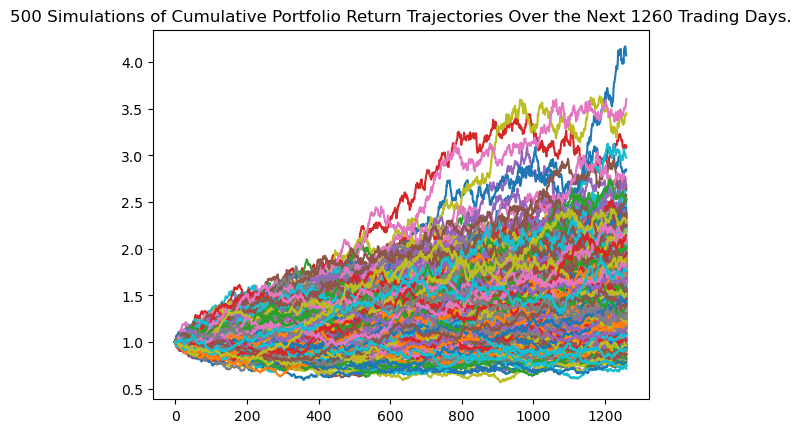

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_years.plot_simulation()

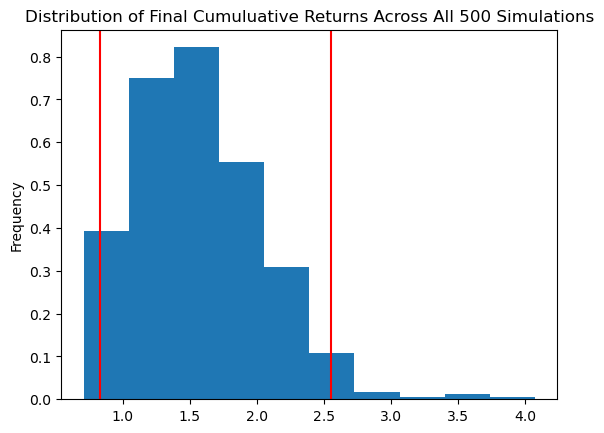

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_five_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.570411
std               0.479845
min               0.712444
25%               1.231369
50%               1.501385
75%               1.855264
max               4.071985
95% CI Lower      0.829050
95% CI Upper      2.550269
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]* initial_investment, 2)
ci_upper_five = round(tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16580.99 and $51005.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years = MCSimulation(portfolio_data = df_stock_data, weights = [0.2, 0.8], num_simulation = 500, num_trading_days = 252*10)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005169,0.997526,0.995357,0.991566,1.017292,1.007433,1.007025,1.001749,0.995063,1.007458,...,0.989826,0.989298,1.005669,0.976913,0.996422,0.981866,0.994166,1.013702,1.018040,0.995519
2,0.999529,0.984934,1.000295,1.001307,1.008595,1.005770,1.014879,1.012661,1.009865,0.993396,...,0.996569,0.961923,1.011055,0.985368,1.008103,0.987013,0.994727,1.001665,1.014194,0.995971
3,0.985435,0.998519,1.011935,1.014495,1.005702,1.023941,0.992138,1.012004,1.009092,0.995548,...,0.996686,0.971092,1.033499,0.974516,1.001645,0.993419,1.001797,1.008799,1.006443,0.988506
4,0.994389,0.998281,1.004632,1.030630,0.996222,1.012514,0.995189,1.015561,1.006266,0.998773,...,0.982738,0.961123,1.041174,0.959899,0.995247,0.978029,1.001375,1.014712,1.015872,0.989924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.093917,4.311919,1.973082,3.825156,1.414559,1.826916,1.768235,2.682630,1.842661,2.083415,...,3.037202,0.788807,2.513001,0.877209,3.225068,2.316288,0.990467,2.920322,4.599280,4.294614
2517,1.096300,4.339872,1.969808,3.811501,1.424783,1.810156,1.765785,2.638388,1.838050,2.051726,...,3.034234,0.808236,2.503452,0.885065,3.244403,2.335309,0.996824,2.913869,4.599920,4.290051
2518,1.096333,4.366467,1.956546,3.764239,1.416808,1.801594,1.764085,2.645794,1.828730,2.063807,...,3.052529,0.810735,2.536734,0.881387,3.166133,2.334237,0.996122,2.936332,4.606989,4.319340
2519,1.080431,4.384211,1.963400,3.775334,1.418633,1.800338,1.774615,2.606716,1.851554,2.028462,...,3.043658,0.812126,2.546010,0.871131,3.194925,2.307211,0.988012,2.984527,4.660400,4.267409


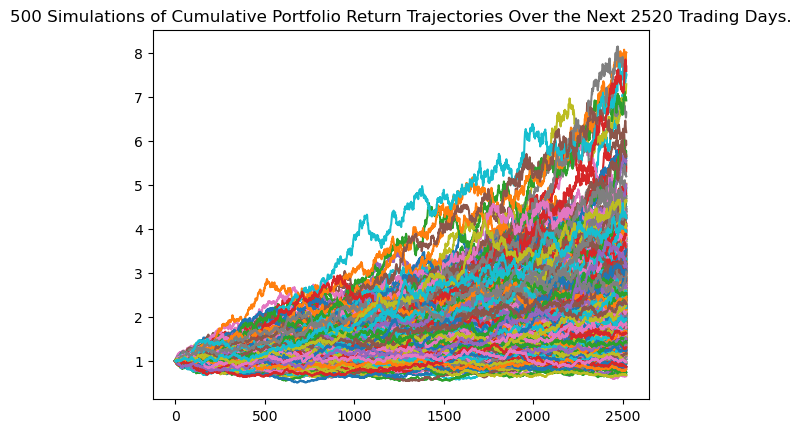

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_years.plot_simulation()

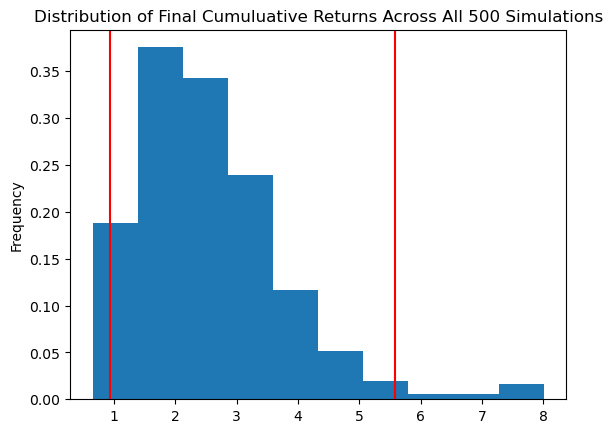

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_ten_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              2.553447
std               1.205635
min               0.654679
25%               1.701504
50%               2.362763
75%               3.131956
max               8.007327
95% CI Lower      0.928068
95% CI Upper      5.579866
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]* initial_investment, 2)
ci_upper_ten = round(tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18561.37 and $111597.32


#### Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 5 or 10 years?

In order to answer this question, let us bring back the 95% confidence interval data for all 3 simulations that I have performed above

In [36]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" (60% weight to SPY and 40% weight to AGG)"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" (80% weight to SPY and 20% weight to AGG)"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" (80% weight to SPY and 20% weight to AGG)"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio (60% weight to SPY and 40% weight to AGG) over the next 30 years will end within in the range of $51014.26 and $622024.48
There is a 95% chance that an initial investment of $20000 in the portfolio (80% weight to SPY and 20% weight to AGG) over the next 5 years will end within in the range of $16580.99 and $51005.38
There is a 95% chance that an initial investment of $20000 in the portfolio (80% weight to SPY and 20% weight to AGG) over the next 10 years will end within in the range of $18561.37 and $111597.32


There are no clear instructions given to us about 'how much money' is enough money to retire. <br>
However, based on the 95% confidence interval data, the lower boundry of both 5 years and 10 years simulation with more weights on stocks ended up even lower than the initial investment of $20,000. <br>
Therefore, based on my simulations and based solely on the 95% confidence interval data, it is likely to say that weighting the portfolio more heavily toward stocks did NOT allow the credit union members to retire after only 5 or 10 years
